## Calculating overpaid overtime hours for years ranging from [2012,2022]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'Court_Overtime_2021_-_2022_ytd.xlsx'
xls = pd.ExcelFile(file_path)

sheet_names = xls.sheet_names
print("Sheet Names:", sheet_names)

# Single workbook with multiple sheets
df2 = pd.read_excel(xls, '2021')
df = pd.read_excel(xls, '2022 ytd')

Sheet Names: ['2021', '2022 ytd']


### Court overpaid overtime hours for 2022

In [2]:
df.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,153140,"Langton,Kylie Ann",Ptl,B-2 DCU SQUAD,B-2 DCU SQUAD,2022-01-03,280,COURT:TRIAL,830,900,0.50,4.0
1,11687,"Gallagher,William",SgtDet,LICENSED PREMISES UNIT,LICENSED PREMISES UNIT,2022-01-03,281,COURT:CLERK MAG. HRG,900,930,0.50,4.0
2,131218,"Smerz,Christopher",Ptl,YOUTH VIOLENCE STRIKE FORCE,YOUTH VIOLENCE STRIKE FORCE,2022-01-03,286,COURT:CASE PREP.,1000,1030,0.50,4.0
3,10744,"Williams,David C.",Det,DOMESTIC VIOLENCE UNIT,DOMESTIC VIOLENCE UNIT,2022-01-03,281,COURT:CLERK MAG. HRG,1015,1100,0.75,4.0
4,153100,"Flaherty,John Michael",Ptl,DISTRICT 04,DISTRICT 04,2022-01-03,281,COURT:CLERK MAG. HRG,900,945,0.75,4.0


In [3]:
df['Overpaid_Hours'] = df['OTHOURS'] - df['WRKDHRS']
overpaid_2022 = df['Overpaid_Hours'].sum()
print("Total overpaid hours for the year 2022:", overpaid_2022)

Total overpaid hours for the year 2022: 37165.5


In [4]:
df.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS,Overpaid_Hours
0,153140,"Langton,Kylie Ann",Ptl,B-2 DCU SQUAD,B-2 DCU SQUAD,2022-01-03,280,COURT:TRIAL,830,900,0.50,4.0,3.50
1,11687,"Gallagher,William",SgtDet,LICENSED PREMISES UNIT,LICENSED PREMISES UNIT,2022-01-03,281,COURT:CLERK MAG. HRG,900,930,0.50,4.0,3.50
2,131218,"Smerz,Christopher",Ptl,YOUTH VIOLENCE STRIKE FORCE,YOUTH VIOLENCE STRIKE FORCE,2022-01-03,286,COURT:CASE PREP.,1000,1030,0.50,4.0,3.50
3,10744,"Williams,David C.",Det,DOMESTIC VIOLENCE UNIT,DOMESTIC VIOLENCE UNIT,2022-01-03,281,COURT:CLERK MAG. HRG,1015,1100,0.75,4.0,3.25
4,153100,"Flaherty,John Michael",Ptl,DISTRICT 04,DISTRICT 04,2022-01-03,281,COURT:CLERK MAG. HRG,900,945,0.75,4.0,3.25


In [6]:
rank_overpaid_hours = df.groupby('RANK')['Overpaid_Hours'].sum()

# Sort the Ranks in descending order based on the total Overpaid_hours
sorted_ranks = rank_overpaid_hours.sort_values(ascending=False)

# Print the Ranks and their corresponding total Overpaid_hours
print("Rank-wise Overpaid Hours in Descending Order:")
for rank, total_hours in sorted_ranks.items():
    print(f"Rank {rank}: Total Overpaid Hours {total_hours}")


Rank-wise Overpaid Hours in Descending Order:
Rank Ptl: Total Overpaid Hours 23113.75
Rank Det: Total Overpaid Hours 9983.75
Rank Sergt: Total Overpaid Hours 2039.5
Rank SgtDet: Total Overpaid Hours 1744.25
Rank Lieut: Total Overpaid Hours 264.25
Rank Capt: Total Overpaid Hours 12.0
Rank LtDet: Total Overpaid Hours 8.0
Rank Civili: Total Overpaid Hours 0.0


In [9]:
employee_overpaid_hours = df.groupby('NAME')['Overpaid_Hours'].sum()

# Sort the Employees in descending order based on the total Overpaid_hours
top_20_overpaid_employees = employee_overpaid_hours.sort_values(ascending=False).head(20)

# Print the top 20 overpaid officers' names, ranks, and overpaid hours
print("Top 20 Overpaid Employees:")
for employee, total_hours in top_20_overpaid_employees.items():
    # Find the rank of the current officer
    rank = df.loc[df['NAME'] == employee, 'RANK'].values[0]
    
    # Print the information
    print(f"Name: {employee}, Rank: {rank}, Overpaid Hours: {total_hours}")


Top 20 Overpaid Employees:
Name: Lee,Waiman, Rank: Det, Overpaid Hours: 432.75
Name: Hernandez,Eddie, Rank: Det, Overpaid Hours: 283.75
Name: Flynn,Robert, Rank: Ptl, Overpaid Hours: 281.75
Name: Malcolm,David, Rank: Ptl, Overpaid Hours: 267.75
Name: Moy,Richard, Rank: Det, Overpaid Hours: 266.75
Name: Williams,David C., Rank: Det, Overpaid Hours: 245.5
Name: Edwards,Daran D, Rank: SgtDet, Overpaid Hours: 234.75
Name: Anderson,Lamont, Rank: Det, Overpaid Hours: 226.0
Name: Hegerich,Daniel J, Rank: Det, Overpaid Hours: 220.0
Name: Gallagher,William, Rank: SgtDet, Overpaid Hours: 208.75
Name: Wallace,Sean, Rank: Det, Overpaid Hours: 203.5
Name: Murray,Timothy D., Rank: Det, Overpaid Hours: 202.75
Name: Coakley,Kevin, Rank: Det, Overpaid Hours: 201.0
Name: Sanon,Serge A., Rank: Det, Overpaid Hours: 196.5
Name: Dineen,John J, Rank: SgtDet, Overpaid Hours: 194.75
Name: Kerrigan,Christopher, Rank: Ptl, Overpaid Hours: 189.5
Name: Juba,Dave E, Rank: Det, Overpaid Hours: 183.25
Name: McGovern,

In [12]:
description_overpaid_hours = df.groupby('DESCRIPTION')['Overpaid_Hours'].sum()

# Sort the descriptions in descending order based on the total overpaid hours
sorted_descriptions = description_overpaid_hours.sort_values(ascending=False)

# Print the number of overpaid hours for each unique description
print("Overpaid Hours by Description (Highest to lowest):")
for description, total_hours in sorted_descriptions.items():
    print(f"Description: {description}, Total Overpaid Hours: {total_hours}")


Overpaid Hours by Description (Highest to lowest):
Description: COURT:TRIAL, Total Overpaid Hours: 15282.0
Description: COURT:CLERK MAG. HRG, Total Overpaid Hours: 8780.75
Description: COURT:MOTIONS HRG., Total Overpaid Hours: 5000.75
Description: COURT:CASE PREP., Total Overpaid Hours: 4858.25
Description: COURT:GRAND JURY TES, Total Overpaid Hours: 1550.75
Description: PROBATION HEARING, Total Overpaid Hours: 658.25
Description: ADMIN. HEARING, Total Overpaid Hours: 618.25
Description: COURT:PRETRIAL CONF., Total Overpaid Hours: 285.25
Description: COURT:JUD.TRAFFIC AP, Total Overpaid Hours: 77.0
Description: PAROLE HEARING, Total Overpaid Hours: 44.75
Description: SPECIAL CIRCUM.Frm26, Total Overpaid Hours: 9.5
Description: COURT, Total Overpaid Hours: 0.0


### Court overpaid overtime hours for 2021

In [20]:
df2.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,153088,"Chen,Steven",Ptl,DISTRICT 01,DISTRICT 01,2021-01-05,281,COURT:CLERK MAG. HRG,900,930,0.50,4.0
1,53603,"Gero,Jarrod A",Det,B-2 DETECTIVES,B-2 DETECTIVES,2021-01-06,283,COURT:MOTIONS HRG.,1130,1230,1.00,4.0
2,11716,"McCarthy,Peter L",Det,B-3 DETECTIVES,B-3 DETECTIVES,2021-01-04,286,COURT:CASE PREP.,1600,1730,1.50,4.0
3,157666,"Mejia,Karen Y",Ptl,DISTRICT 01,DISTRICT 01,2021-01-04,281,COURT:CLERK MAG. HRG,900,930,0.50,4.0
4,12045,"Merricks,Kirk D.",Ptl,DISTRICT 01,DISTRICT 01,2021-01-05,281,COURT:CLERK MAG. HRG,900,915,0.25,4.0


In [21]:
df2['Overpaid_Hours'] = df2['OTHOURS'] - df2['WRKDHRS']
overpaid_2021 = df2['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2021:", overpaid_2021)

Total overpaid hours for year 2021: 29836.0


### Court overpaid overtime hours for years 2018-2020

In [22]:
import pandas as pd

file_path = 'Court_Overtime_2018_-_2020.xlsx'
xls = pd.ExcelFile(file_path)

# Single workbook with multiple sheets
df1 = pd.read_excel(xls, '2018')
df2 = pd.read_excel(xls, '2019')
df3 = pd.read_excel(xls, '2020')


#### 2020

In [23]:
df3.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,11120.0,"Moriarty,Richard G",Det,C-6 DETECTIVES,C-6 DETECTIVES,2020-01-02,283,COURT:MOTIONS HRG.,930,1000,0.5,4.0
1,144460.0,"Linsky,Benjamin N",Ptl,DISTRICT 02,DISTRICT 02,2020-01-03,281,COURT:CLERK MAG. HRG,900,930,0.5,4.0
2,135932.0,"McBrien,Marc",Ptl,DISTRICT 02,DISTRICT 02,2020-01-03,280,COURT:TRIAL,830,900,0.5,4.0
3,95177.0,"O'Rourke,Michael",Ptl,DISTRICT 02,DISTRICT 02,2020-01-03,281,COURT:CLERK MAG. HRG,900,1000,1.0,4.0
4,93797.0,"Fogarty,Matthew J",Det,B-3 DETECTIVES,B-3 DETECTIVES,2020-01-03,282,COURT:PRETRIAL CONF.,900,1000,1.0,4.0


In [24]:
df3['Overpaid_Hours'] = df3['OTHOURS'] - df3['WRKDHRS']
overpaid_2020 = df3['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2020:", overpaid_2020)

Total overpaid hours for year 2020: 23405.75


#### 2019

In [25]:
df2.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,108602,"Pokrant,Drew",Ptl,DISTRICT 18,DISTRICT 18,2019-01-02,288,PROBATION HEARING,830,1100,2.5,4.0
1,96731,"Barrett,Thomas E.",SgtDet,HOMICIDE UNIT,HOMICIDE UNIT,2019-01-02,283,COURT:MOTIONS HRG.,900,1330,4.5,4.5
2,103784,"Samaras,William J.",Det,E-5 DCU SQUAD,E-5 DCU SQUAD,2019-01-02,283,COURT:MOTIONS HRG.,900,1030,1.5,4.0
3,10597,"Troy,Anthony E.",SgtDet,E-5 DCU SQUAD,E-5 DCU SQUAD,2019-01-02,283,COURT:MOTIONS HRG.,900,1030,1.5,4.0
4,10652,"Keenan,Donald F",SgtDet,D-4 DCU SQUAD,D-4 DCU SQUAD,2019-01-04,280,COURT:TRIAL,830,930,1.0,4.0


In [26]:
df2['Overpaid_Hours'] = df2['OTHOURS'] - df2['WRKDHRS']
overpaid_2019 = df2['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2019:", overpaid_2019)

Total overpaid hours for year 2019: 60654.25


#### 2018

In [27]:
df1.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,9033,"O'Brien,Stephen T",Det,B-3 DETECTIVES,B-3 DETECTIVES,2018-01-02,281,COURT:CLERK MAG. HRG,1000,1100,1.00,4.0
1,50308,"O'Toole,John Edward",Ptl,E-18 DCU SQUAD,E-18 DCU SQUAD,2018-01-03,283,COURT:MOTIONS HRG.,830,1015,1.75,4.0
2,102349,"Monahan,Keith",Ptl,E-18 DCU SQUAD,E-18 DCU SQUAD,2018-01-03,283,COURT:MOTIONS HRG.,830,1015,1.75,4.0
3,11575,"Adams,Daniel J",Det,E-18 DCU SQUAD,E-18 DCU SQUAD,2018-01-03,283,COURT:MOTIONS HRG.,830,1015,1.75,4.0
4,103759,"Green,W. Scot",Ptl,E-18 DCU SQUAD,E-18 DCU SQUAD,2018-01-03,283,COURT:MOTIONS HRG.,830,1015,1.75,4.0


In [28]:
df1['Overpaid_Hours'] = df1['OTHOURS'] - df1['WRKDHRS']
overpaid_2018 = df1['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2018:", overpaid_2018)

Total overpaid hours for year 2018: 57864.5


### Court overpaid overtime hours for years 2015-2017

In [29]:
file_path = 'Court_Overtime_2015_-_2017.xlsx'
xls = pd.ExcelFile(file_path)

# Single workbook with multiple sheets
df1 = pd.read_excel(xls, '2015')
df2 = pd.read_excel(xls, '2016')
df3 = pd.read_excel(xls, '2017')

#### 2017

In [30]:
df3.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,11184,"Smigliani,Steven",Ptl,DISTRICT 06,DISTRICT 06,2017-01-03,281,COURT:CLERK MAG. HRG,900,1000,1.00,4.0
1,10439,"Painten,Paul A",Det,C-11 DETECTIVES,C-11 DETECTIVES,2017-01-04,280,COURT:TRIAL,830,900,0.50,4.0
2,9969,"Doogan,Kevin M",Det,C-11 DETECTIVES,C-11 DETECTIVES,2017-01-03,281,COURT:CLERK MAG. HRG,830,1000,1.50,4.0
3,126514,"Schain,Ryan",Ptl,DISTRICT 11,DISTRICT 11,2017-01-04,288,PROBATION HEARING,845,1100,2.25,4.0
4,8361,"McGill,Kevin J",Det,D-4 DETECTIVES,D-4 DETECTIVES,2017-01-03,281,COURT:CLERK MAG. HRG,830,930,1.00,4.0


In [31]:
df3['Overpaid_Hours'] = df3['OTHOURS'] - df3['WRKDHRS']
overpaid_2017 = df3['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2017:", overpaid_2017)

Total overpaid hours for year 2017: 59615.75


#### 2016

In [32]:
df2.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,108605,"Roberto,Manuel",Ptl,DISTRICT 11,DISTRICT 11,2016-01-04,288,PROBATION HEARING,1400,1545,1.75,4.0
1,102959,"Flaherty,Patrick S",Ptl,DISTRICT 11,DISTRICT 11,2016-01-04,280,COURT:TRIAL,830,1030,2.00,4.0
2,107289,"Carey,Brandon Shane",Ptl,DISTRICT 11,DISTRICT 11,2016-01-04,280,COURT:TRIAL,830,1200,3.50,4.0
3,11051,"Moy,Richard",Det,C-11 DETECTIVES,C-11 DETECTIVES,2016-01-04,281,COURT:CLERK MAG. HRG,900,1000,1.00,4.0
4,131219,"Smith,Brian T",Ptl,DISTRICT 03,DISTRICT 03,2016-01-04,280,COURT:TRIAL,830,1030,2.00,4.0


In [33]:
df2['Overpaid_Hours'] = df2['OTHOURS'] - df2['WRKDHRS']
overpaid_2016 = df2['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2016:", overpaid_2016)

Total overpaid hours for year 2016: 62752.75


#### 2015

In [34]:
df1.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,116940,"Tracey,Brian E",Ptl,DISTRICT 11,DISTRICT 11,2015-01-02,283,COURT:MOTIONS HRG.,830,1030,2.0,4.0
1,81127,"Malcolm,David",Ptl,DISTRICT 01,DISTRICT 01,2015-01-02,286,COURT:CASE PREP.,1130,1400,2.5,4.0
2,11409,"Edghill-Yard,Susan R",Sergt,DISTRICT 06,DISTRICT 06,2015-01-05,286,COURT:CASE PREP.,1000,1300,3.0,4.0
3,11410,"Fitzpatrick,Richard H",Sergt,DISTRICT 11,DISTRICT 11,2015-01-05,288,PROBATION HEARING,900,930,0.5,4.0
4,120929,"Columbo,Dominic A",Ptl,DISTRICT 02,DISTRICT 02,2015-01-05,280,COURT:TRIAL,830,1100,2.5,4.0


In [35]:
df1['Overpaid_Hours'] = df1['OTHOURS'] - df1['WRKDHRS']
overpaid_2015 = df1['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2015:", overpaid_2015)

Total overpaid hours for year 2015: 65135.75


### Court overpaid overtime hours for years 2012-2014

In [36]:
file_path = 'Court_Overtime_2012_-_2014.xlsx'
xls = pd.ExcelFile(file_path)

# Single workbook with multiple sheets
df1 = pd.read_excel(xls, '2012')
df2 = pd.read_excel(xls, '2013')
df3 = pd.read_excel(xls, '2014')

#### 2014

In [37]:
df3.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,116168,"Gomes,Jose",Ptl,DISTRICT 03,DISTRICT 03,2014-01-02,280,COURT:TRIAL,900,930,0.5,4.0
1,10439,"Painten,Paul A",Det,B-2 DETECTIVES,B-2 DETECTIVES,2014-01-02,281,COURT:CLERK MAG. HRG,900,1000,1.0,4.0
2,9282,"Fontanez,Peter N",Ptl,A-7 DCU SQUAD,A-7 DCU SQUAD,2014-01-03,283,COURT:MOTIONS HRG.,830,930,1.0,4.0
3,11715,"McCarthy,John A",Det,A-7 DCU SQUAD,A-7 DCU SQUAD,2014-01-03,283,COURT:MOTIONS HRG.,830,930,1.0,4.0
4,95168,"Byrne,Patrick Edward",Ptl,A-1 DCU SQUAD,A-1 DCU SQUAD,2014-01-02,280,COURT:TRIAL,830,1000,1.5,4.0


In [38]:
df3['Overpaid_Hours'] = df3['OTHOURS'] - df3['WRKDHRS']
overpaid_2014 = df3['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2014:", overpaid_2014)

Total overpaid hours for year 2014: 63513.75


#### 2013

In [39]:
df2.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,9588,"Keeley,Thomas J",Det,D-4 DETECTIVES,D-4 DETECTIVES,2013-01-02,281,COURT:CLERK MAG. HRG,830,1000,1.50,4.0
1,10186,"Parlon,William Leo",Det,D-4 DETECTIVES,D-4 DETECTIVES,2013-01-02,281,COURT:CLERK MAG. HRG,830,930,1.00,4.0
2,10439,"Painten,Paul A",Det,B-2 DETECTIVES,B-2 DETECTIVES,2013-01-02,281,COURT:CLERK MAG. HRG,830,915,0.75,4.0
3,10305,"Stratton,Michael J",SgtDet,B-2 DETECTIVES,B-2 DETECTIVES,2013-01-02,286,COURT:CASE PREP.,1430,1600,1.50,4.0
4,10305,"Stratton,Michael J",SgtDet,B-2 DETECTIVES,B-2 DETECTIVES,2013-01-03,280,COURT:TRIAL,1000,1100,1.00,4.0


In [40]:
df2['Overpaid_Hours'] = df2['OTHOURS'] - df2['WRKDHRS']
overpaid_2013 = df2['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2013:", overpaid_2013)

Total overpaid hours for year 2013: 66088.0


#### 2012

In [41]:
df1.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,103591,"Bissonnette,Philip",Ptl,DISTRICT 03,DISTRICT 03,2012-01-04,280,COURT:TRIAL,900,915,0.25,4.0
1,103782,"Rooney,Kevin D.",Ptl,DISTRICT 03,DISTRICT 03,2012-01-03,280,COURT:TRIAL,915,930,0.25,4.0
2,11045,"Ruiz,Jose A.",Ptl,DISTRICT 03,DISTRICT 03,2012-01-03,283,COURT:MOTIONS HRG.,830,1000,1.50,4.0
3,9726,"Doherty,Henry J",Ptl,DISTRICT 03,DISTRICT 03,2012-01-04,280,COURT:TRIAL,830,915,0.75,4.0
4,11395,"Boylan,Edward J",Ptl,DISTRICT 11,DISTRICT 11,2012-01-03,280,COURT:TRIAL,830,1000,1.50,4.0


In [42]:
df1['Overpaid_Hours'] = df1['OTHOURS'] - df1['WRKDHRS']
overpaid_2012 = df1['Overpaid_Hours'].sum()
print("Total overpaid hours for year 2012:", overpaid_2012)

Total overpaid hours for year 2012: 74320.25


## Now we have the overpaid hours for the years ranging from 2012 to 2022, let's visualize how overtime for the court appearances changed year-over-year

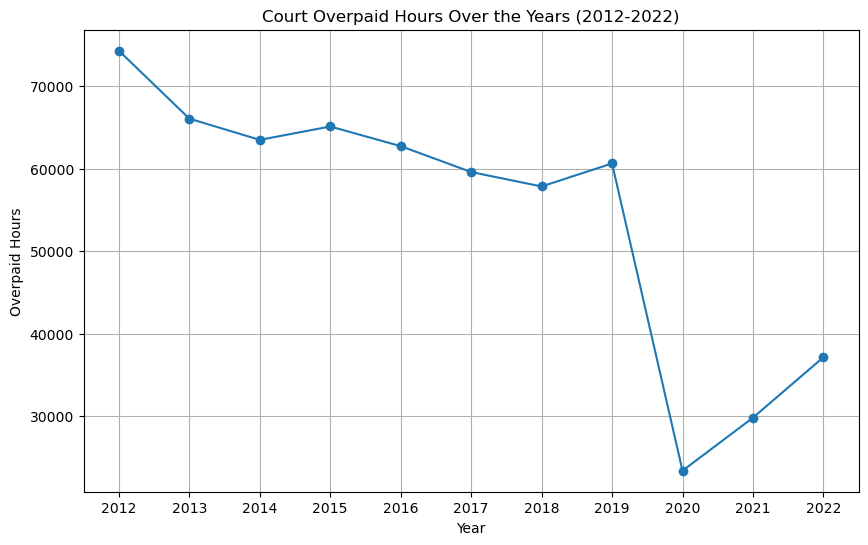

In [16]:
# Extract the years and overpaid hours
years = list(range(2012, 2023))
overpaid = [overpaid_2012, overpaid_2013, overpaid_2014, overpaid_2015, overpaid_2016, overpaid_2017, overpaid_2018, overpaid_2019, overpaid_2020, overpaid_2021, overpaid_2022]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(years, overpaid, marker='o', linestyle='-')
plt.title('Court Overpaid Hours Over the Years (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Overpaid Hours')
plt.grid(True)
plt.xticks(years)
plt.show()

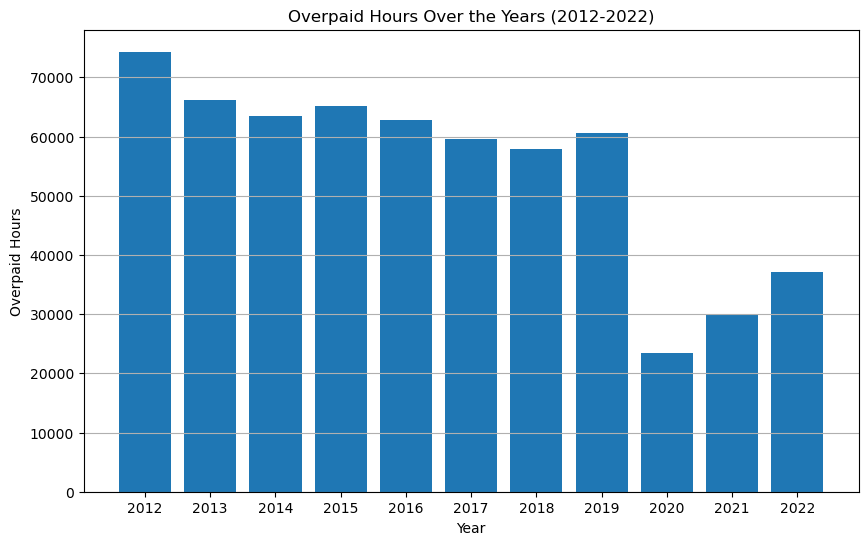

In [43]:
plt.figure(figsize=(10, 6))
plt.bar(years, overpaid)
plt.title('Overpaid Hours Over the Years (2012-2022)')
plt.xlabel('Year')
plt.ylabel('Overpaid Hours')
plt.grid(axis='y')
plt.xticks(years)
plt.show()

## Distribution of ratios of overtime worked vs. overtime paid. Finding potential outliers in the court OT database. This has been done for the year 2022 and can be done similarly for each year

Mean Overtime Ratio: 0.38
Median Overtime Ratio: 0.25
Standard Deviation of Overtime Ratio: 0.29
Potential Outliers:
                            NAME  Average_Overtime_Ratio
14431  Agudelo-Echevarria,Marily                0.062500
8063           Becker,Matthew F.                0.093750
14740      Charles-Sampson,Azadi                0.093750
13188            Crabbe,David D.                0.093750
10355           Fantaroni,Evan M                0.062500
581                Foley,James M                0.093750
5035        Hyppolite,Jonathan A                0.062500
13884            Lawless,Timothy                0.093750
6697       Legacy,Mary Katherine                0.062500
14836      Lonergan,Ryan Charles                0.093750
6592                Mendes,Kevin                0.062500
14832          Milton,Christa A.                0.062500
8293         Murphy,Daniel Brian                0.062500
1745               Powell,Nadine                0.093750
4622              Ross,Allis

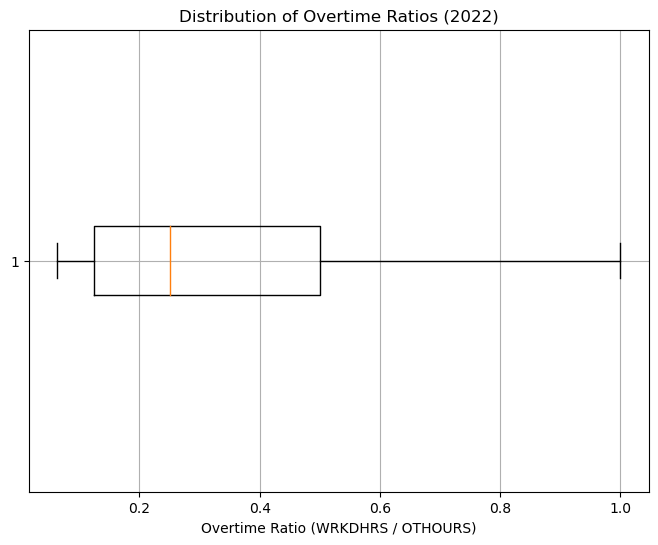

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data for the specific year
file_path = 'Court_Overtime_2021_-_2022_ytd.xlsx'
xls = pd.ExcelFile(file_path)
df = pd.read_excel(xls, '2022 ytd')

# Calculate the ratio of overtime worked (WRKDHRS) vs. overtime paid (OTHOURS)
df['Overtime_Ratio'] = df['WRKDHRS'] / df['OTHOURS']

# Rearrange the DataFrame based on 'NAME'
df = df.sort_values(by='NAME')

# Calculate the 'Average_Overtime_Ratio' for each 'NAME'
df['Average_Overtime_Ratio'] = df.groupby('NAME')['Overtime_Ratio'].transform('mean')

# Summary statistics
ratio_mean = df['Overtime_Ratio'].mean()
ratio_median = df['Overtime_Ratio'].median()
ratio_std = df['Overtime_Ratio'].std()

# Create a box plot to identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df['Overtime_Ratio'], vert=False)
plt.title('Distribution of Overtime Ratios (2022)')
plt.xlabel('Overtime Ratio (WRKDHRS / OTHOURS)')
plt.grid(True)

# Print summary statistics
print(f"Mean Overtime Ratio: {ratio_mean:.2f}")
print(f"Median Overtime Ratio: {ratio_median:.2f}")
print(f"Standard Deviation of Overtime Ratio: {ratio_std:.2f}")

# Remove duplicate 'NAME' entries, keeping only the first occurrence
outliers = df.drop_duplicates(subset='NAME', keep='first')

# After visualizing the above plot, we set a threshold to identify potential outliers
# we set the threshold to 0.1, which means a person actually works 1 hour for every 10 hours they get paid
threshold = 0.1

# Identify potential outliers based on the threshold
outliers = outliers[outliers['Average_Overtime_Ratio'] < threshold]
outliers = outliers[['NAME', 'Average_Overtime_Ratio']]
print("Potential Outliers:")
print(outliers)

plt.show()
